二项分布

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统
class X_B:
    def __init__(self,n,p):
        samples = np.random.binomial(n, p, 1000)
        self.samples = samples
        self.k = range(0,n+1)
        self.f = [comb(n,i)*(p**(i))*((1-p)**(n-i)) for i in self.k]
n = 20
p = 0.5
a = X_B(n,p)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14, 6)) 
ax1.hist(a.samples, bins=np.arange(-0.5, n+1.5, 1), density=True, alpha=0.5, label='样本分布')
ax2.bar(a.k, a.f, alpha=0.7, label='theoratical PMF')
ax1.set_title(f'binomial distribution (n={n}, p={p})')
ax1.set_xlabel('times of success')
ax1.set_ylabel('probability')
ax1.set_xticks(range(n+1))               # 设置x轴刻度为0~10
ax1.legend()  # 显示图例
ax1.grid(True, linestyle='--', alpha=0.5)  # 添加虚线网格
ax2.set_title(f'binomial distribution (n={n}, p={p})')
ax2.set_xlabel('times of success')
ax2.set_ylabel('probability')
ax2.set_xticks(range(n+1))               # 设置x轴刻度为0~10
ax2.legend()  # 显示图例
ax2.grid(True, linestyle='--', alpha=0.5)  # 添加虚线网格
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统
class X_B:
    def __init__(self,n,p):
        samples = np.random.binomial(n, p, 1000)
        self.samples = samples
        self.k = range(0,n+1)
        self.f = [comb(n,i)*(p**(i))*((1-p)**(n-i)) for i in self.k]
n = 20
p = 0.5
a = X_B(n,p)
figsize=(14, 6)
plt.hist(a.samples, bins=np.arange(-0.5, n+1.5, 1), density=True, color='blue', alpha=0.6, edgecolor='black', label='样本分布')
plt.bar(a.k, a.f, color='red', alpha=0.7, edgecolor='black', label='theoratical PMF')
plt.title(f'binomial distribution (n={n}, p={p})')
plt.xlabel('times of success')
plt.ylabel('probability')
plt.xticks(range(n+1))               # 设置x轴刻度为0~10
plt.legend()  # 显示图例
plt.grid(True, linestyle='--', alpha=0.5)  # 添加虚线网格
plt.show()

泊松分布

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp,factorial
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统
class X_P:
    def __init__(self,lambda_, max_k):
        samples = np.random.poisson(lambda_, 1000)
        self.samples = samples
        self.k = range(0, max_k+1)
        self.f = [exp(-lambda_) * (lambda_**k) / factorial(k) for k in self.k]
    
lambda_ = 5
max_k = 25
a = X_P(lambda_, max_k)
figsize=(14, 6)
plt.hist(a.samples, bins=np.arange(-0.5, max_k+1.5, 1), density=True, color='blue', alpha=0.6, edgecolor='black', label='样本分布')
plt.bar(a.k, a.f, color='red', alpha=0.7, edgecolor='black', label='theoratical PMF')
plt.title(f'poission distribution (lambda={lambda_}, max_k={max_k})')
plt.xlabel('times of success')
plt.ylabel('probability')
plt.xticks(range(max_k+1))               # 设置x轴刻度为0~10
plt.legend()  # 显示图例
plt.grid(True, linestyle='--', alpha=0.5)  # 添加虚线网格
plt.show()

二项分布与泊松分布比较

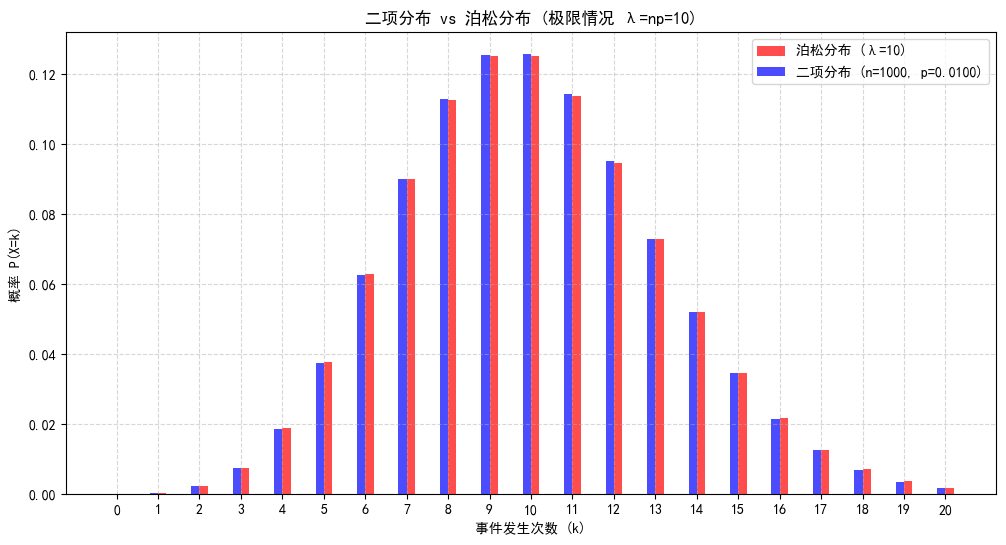

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp,factorial,comb,log
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统
class X_P:
    def __init__(self,lambda_, max_k):
        self.k = np.arange(0, max_k+1)
        self.f = [exp(-lambda_ + k*log(lambda_) - log(factorial(k))) for k in self.k]

class X_B:
    def __init__(self,n,p):
        self.k = np.arange(0,n+1)
        self.f = [exp(log(comb(n,i)) + i*log(p) + (n-i)*log(1-p)) for i in self.k[0:21]]

lambda_ = 10
max_k = 20
n = 1000
p = lambda_/n
a = X_P(lambda_, max_k)
plt.figure(figsize=(12, 6))
plt.bar(a.k+0.1, a.f, width=0.2, color='red', alpha=0.7, label=f'泊松分布 (λ={lambda_})')
b = X_B(n, p)
plt.bar(b.k[0:21]-0.1, b.f, width=0.2, color='blue', alpha=0.7, label=f'二项分布 (n={n}, p={p:.4f})')
plt.title(f'二项分布 vs 泊松分布 (极限情况 λ=np={lambda_})')
plt.xlabel('事件发生次数 (k)')
plt.ylabel('概率 P(X=k)')
plt.xticks(range(max_k+1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# ========== 配置中文字体 ==========
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows
plt.rcParams['axes.unicode_minus'] = False    # 修复负号

# ========== 参数设置 ==========
lambda_ = 5         # 泊松分布参数λ
n_binomial = 1000   # 二项分布的试验次数n
p_binomial = lambda_ / n_binomial  # 二项分布的成功概率p = λ/n
max_k = 20          # 显示的最大k值

# ========== 计算PMF ==========
k_values = np.arange(0, max_k+1)

# 二项分布PMF
binom_pmf = binom.pmf(k_values, n_binomial, p_binomial)

# 泊松分布PMF
poisson_pmf = poisson.pmf(k_values, mu=lambda_)

# ========== 可视化 ==========
plt.figure(figsize=(12, 6))

# 绘制二项分布
plt.bar(k_values - 0.1, binom_pmf, 
        width=0.2, 
        color='blue', 
        alpha=0.7, 
        label=f'二项分布 (n={n_binomial}, p={p_binomial:.4f})')

# 绘制泊松分布
plt.bar(k_values + 0.1, poisson_pmf, 
        width=0.2, 
        color='red', 
        alpha=0.7, 
        label=f'泊松分布 (λ={lambda_})')

# 图表装饰
plt.title('二项分布 vs 泊松分布 (极限情况 λ=np=5)')
plt.xlabel('事件发生次数 (k)')
plt.ylabel('概率 P(X=k)')
plt.xticks(k_values)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [ ]:
from math import exp,factorial,comb,log
a=2.73
b=log(a)

print(b)

SyntaxError: invalid syntax (4233527540.py, line 3)